In [2]:
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [3]:
trainingData = [[0.9798, 0.2, 1],[0.3, 0.954, 0]]
queryData = [0.85, 0.5268]

# Normalize trainingData
vecLen = math.sqrt(trainingData[0][0]**2 + trainingData[0][1]**2);
trainingData[0][0] = trainingData[0][0]/vecLen
trainingData[0][1] = trainingData[0][1]/vecLen
vecLen = math.sqrt(trainingData[1][0]**2 + trainingData[1][1]**2);
trainingData[1][0] = trainingData[1][0]/vecLen
trainingData[1][1] = trainingData[1][1]/vecLen

In [4]:
# Normalize queryData
vecLen = math.sqrt(queryData[0]**2 + queryData[1]**2);
queryData[0] = queryData[0]/vecLen
queryData[1] = queryData[1]/vecLen

# Compute Euclidean Distances Squared
euclideanDistanceSquared = [0,0]
euclideanDistanceSquared[0] = (queryData[0]-trainingData[0][0])**2 + (queryData[1]-trainingData[0][1])**2
euclideanDistanceSquared[1] = (queryData[0]-trainingData[1][0])**2 + (queryData[1]-trainingData[1][1])**2


In [5]:
# Compute Weights
weights = [0,0]
weights[0] = 1 - 0.25*euclideanDistanceSquared[0]
weights[1] = 1 - 0.25*euclideanDistanceSquared[1]

# Normalize Weights
weightSum = (weights[0] + weights[1])
weights[0] = weights[0] / weightSum
weights[1] = weights[1] / weightSum

print("Classical Machine Learning:")
print("P(1) = ",weights[0],"    P(0) = ",weights[1])
print("")

Classical Machine Learning:
P(1) =  0.5244421365167681     P(0) =  0.475557863483232



Quantum Machine Learning:
P(1) =  0.5391209983722192     P(0) =  0.4608790016277808


Intermediate State Vectors:
After Hadamard  Statevector([ 0.        +0.00000000e+00j,  0.64692786-3.68027968e-17j,
              0.        +0.00000000e+00j,  0.25696062-2.28090745e-17j,
              0.40657751-3.68027968e-17j,  0.        +0.00000000e+00j,
              0.5235206 -2.28090745e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.04589258+3.68027968e-17j,
              0.        +0.00000000e+00j, -0.11553983+2.28090745e-17j,
             -0.19445778+3.68027968e-17j,  0.        +0.00000000e+00j,
              0.15102015+2.28090745e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))
After Measuring Qubit3  Statevector([ 0.        +0.00000000e+00j,  0.67303531-3.82880118e-17j,
              0.        +0.00000000e+00j,  0.26733053-2.37295584e-17j,
              0.42298536-3.82880118e-17j,  0.        +0.00000000e+00j,
              0.54464782-2.372955

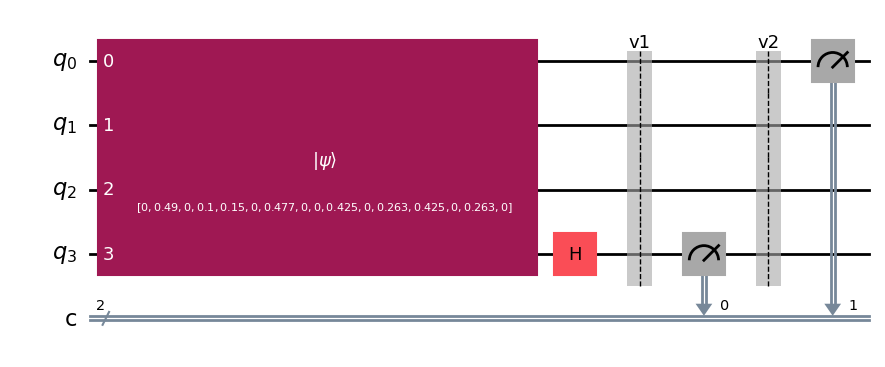

In [6]:
simulator = Aer.get_backend("aer_simulator")

circuit = QuantumCircuit(4,2)
initial_state = [0,trainingData[0][0]/2,0,trainingData[0][1]/2,trainingData[1][0]/2,0,trainingData[1][1]/2,0,0,queryData[0]/2,0,queryData[1]/2,queryData[0]/2, 0,queryData[1]/2,0]   
circuit.initialize(initial_state)
circuit.h(3)
circuit.save_statevector(label='v1')
circuit.measure(3,0)
circuit.save_statevector(label='v2')
circuit.measure(0,1)

# compile the circuit to simulator
compiled_circuit = transpile(circuit, simulator)
# Execute the circuit on the simulator. 1000 times.
numerator = 0
denominator = 0
for i in range(0,10000):
    job = simulator.run(compiled_circuit, shots=1)
    # Get results
    result = job.result()
    # Get counts from results
    counts = result.get_counts(compiled_circuit)
    if("00" in counts or "10" in counts):
        stateAfterMeasuringQ3 = result.data(0)['v2']
        denominator += 1
        if("10" in counts):
            numerator += 1
    
print("Quantum Machine Learning:")
print("P(1) = ",numerator/denominator,"    P(0) = ",(denominator-numerator)/denominator)
print("")
print("")
print("Intermediate State Vectors:")
print("After Hadamard ",result.data(0)['v1'])
print("After Measuring Qubit3 ",stateAfterMeasuringQ3)
circuit.draw(output = "mpl")